In [1]:
"""Main excecuter for the Project"""
import numpy as np
#Strange issue with matplotlib: https://github.com/matplotlib/matplotlib/issues/9294/
import matplotlib as mpl
mpl.use('TkAgg')  # or whatever other backend that you want
import matplotlib.pyplot as plt
%matplotlib inline
import sys


In [2]:
#%matplotlib inline

## Import data

1. Importing the data of the groups.
2. The data subfolder is divided in Numerical, Theoretical and Experimental. If the subfoder does not exist it means it hasn't been created yet.
3. In each subfolder you can find the .csv files. Each file has the same structure. Two rows (group number) and headers and then the data for the coefficients. A typical name for a file is: Numerical_Group_1.csv


In [3]:
alpha = np.array([-4,0,4,8,12,16,20])

In [4]:
numerical_path = "data/numerical/"
theoretical_path = "data/theoretical/"
experimental_path = "data/experimental/"

In [5]:
group_numbers = np.arange(6)+1
group_indices = np.arange(6)

In [6]:
numerical_files = []
theoretical_files = []
experimental_files = []

for number in group_numbers:
    num_file = numerical_path+"Numerical_Group_"+str(number)+".csv"
    theo_file = theoretical_path+"Theoretical_Group_"+str(number)+".csv"
    exp_file = experimental_path+"Experimental_Group_"+str(number)+".csv"
    numerical_files.append(num_file)
    theoretical_files.append(theo_file)
    experimental_files.append(exp_file)

In [7]:
print(numerical_files)

['data/numerical/Numerical_Group_1.csv', 'data/numerical/Numerical_Group_2.csv', 'data/numerical/Numerical_Group_3.csv', 'data/numerical/Numerical_Group_4.csv', 'data/numerical/Numerical_Group_5.csv', 'data/numerical/Numerical_Group_6.csv']


In [8]:
def import_data_group(data_path):
    header=np.genfromtxt(data_path, delimiter=",", max_rows=2 , dtype=str)
    group_number_file = header[0]
    header_columns = header[1]
    x = np.genfromtxt(data_path, delimiter=",", skip_header=2)
    return group_number_file, header_columns, x

In [9]:
i=1
data_path = numerical_files[i]
#Import the header
group_number_file, header_columns, x = import_data_group(data_path)
print(header_columns)
print(np.shape(x))

['Cl' 'Cd' 'Cm']
(7, 3)


Every row corresponds to the values for an $\alpha$ and every column corresponds to the values for a coefficient.

In [10]:
print(x[:,0] )

[-0.22009  0.2164   0.66027  1.0401   1.239    1.15         nan]


## Plotting for one group

In [11]:
i=1

In [12]:
group_number = group_numbers[i]
data_path = numerical_files[i]
group_number_file, header_columns, x = import_data_group(data_path)

Text(0.5,1,'Group 2')

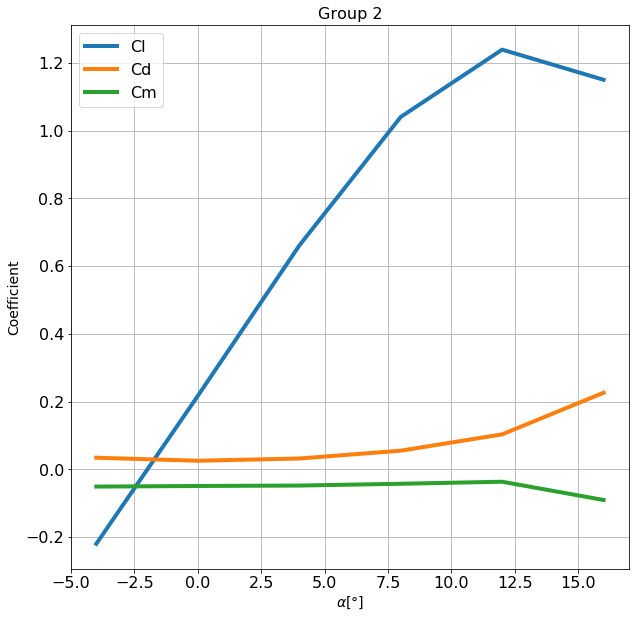

In [13]:
fig = plt.figure(figsize=(10,10))
for x_arr, label in zip(x.T, header_columns):
    plt.plot(alpha, x_arr, label=label, linewidth =4)
plt.ylabel("Coefficient",fontsize='14')
plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
plt.tick_params(labelsize=16)
plt.legend(fontsize='16')
plt.grid()
plt.title("Group "+str(group_number), fontsize='16')

In [14]:
plt.close(fig)

# Global Parameters

In [15]:
N_coeff = 3 #We are computing 3 coeffs
N_groups = 6 #We have 6 groups
N_angles = len(alpha)
header_columns = ['C_l', 'C_d', 'C_m']

## Numerical

In [16]:
group_names = ['Spalart-Allmaras-1', 'Spalart-Allmaras-2', 'k-$\omega$-SST', 'Realizable-k-$\epsilon$-1','Realizable-k-$\epsilon$-2','Realizable-k-$\epsilon$-3' ]

In [17]:
numerical_all = np.zeros((N_groups, N_angles, N_coeff))

In [18]:
for i in group_indices:
    group_number = group_numbers[i]
    data_path = numerical_files[i]
    group_number_file, header_columns, x = import_data_group(data_path)
    numerical_all[i] = x

In [19]:
mean_numerical = np.nanmean(numerical_all,axis=0)
std_numerical = np.nanstd(numerical_all,axis=0)

Text(0.5,1,'Global Numerical Results')

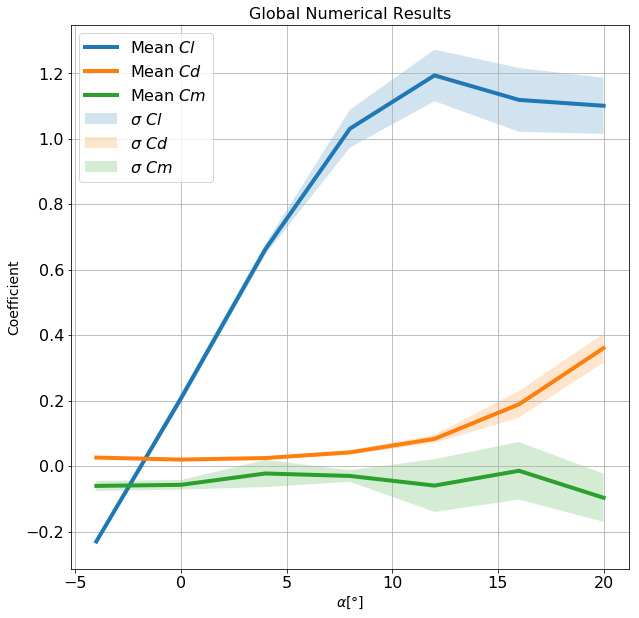

In [20]:
fig = plt.figure(figsize=(10,10))
for x_mean, x_std, header in zip(mean_numerical.T, std_numerical.T, header_columns):
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
plt.ylabel("Coefficient",fontsize='14')
plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
plt.tick_params(labelsize=16)
plt.legend(fontsize='16')
plt.grid()
plt.title("Global Numerical Results", fontsize='16')

In [21]:
plt.close(fig)

### By Coefficient

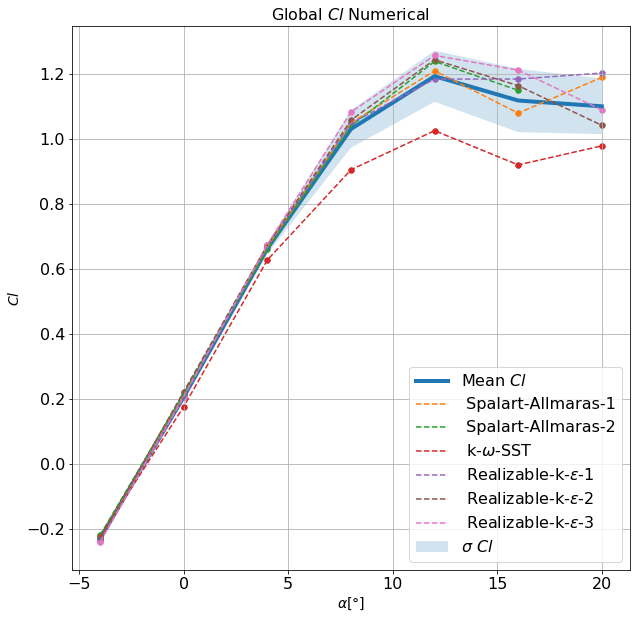

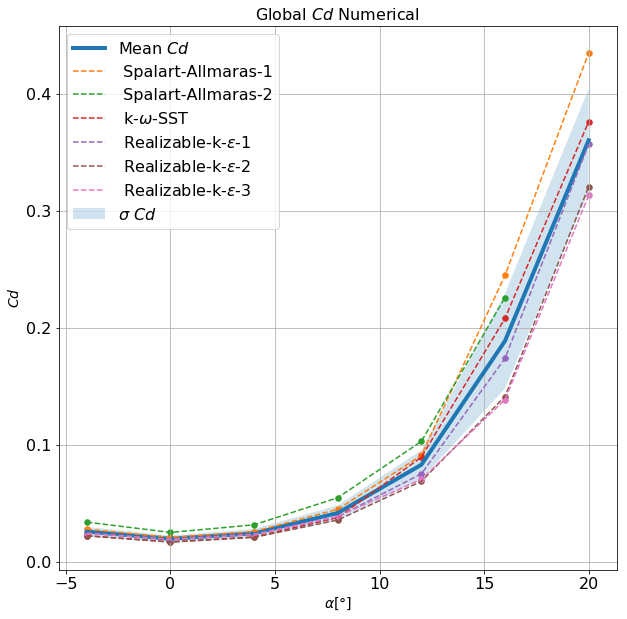

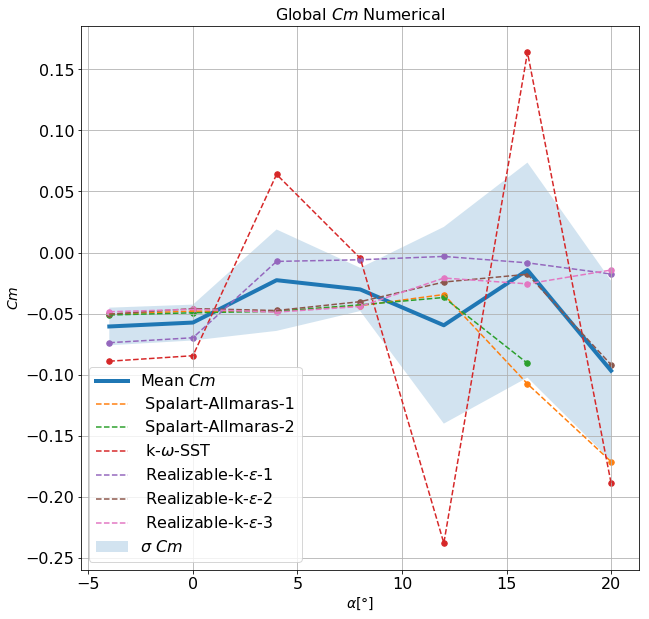

In [22]:
coeff_counter = 0
for x_mean, x_std, header in zip(mean_numerical.T, std_numerical.T, header_columns):
    fig = plt.figure(figsize=(10,10))
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
    for i in group_indices:
        group_number = group_numbers[i]
        group_name = group_names[i]
        data_path = numerical_files[i]
        group_number_file_i, header_columns_i, x = import_data_group(data_path)
        x_array = x.T[coeff_counter]
        plt.scatter(alpha, x_array,s=30)#, label='Group '+str(group_number))
        plt.plot(alpha, x_array,label=r' '+group_name,linestyle='--')
    plt.ylabel(r'$'+header+'$', fontsize='14')
    plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    plt.title(r'Global $'+header+'$ Numerical', fontsize='16')
    coeff_counter = coeff_counter + 1

## Theoretical

In [23]:
theoretical_all = np.zeros((N_groups, N_angles, N_coeff))

In [24]:
for i in group_indices:
    group_number = group_numbers[i]
    data_path = theoretical_files[i]
    group_number_file, header_columns, x = import_data_group(data_path)
    theoretical_all[i] = x

In [25]:
mean_theoretical = np.nanmean(theoretical_all,axis=0)
std_theoretical = np.nanstd(theoretical_all,axis=0)

Text(0.5,1,'Global Theoretical Results')

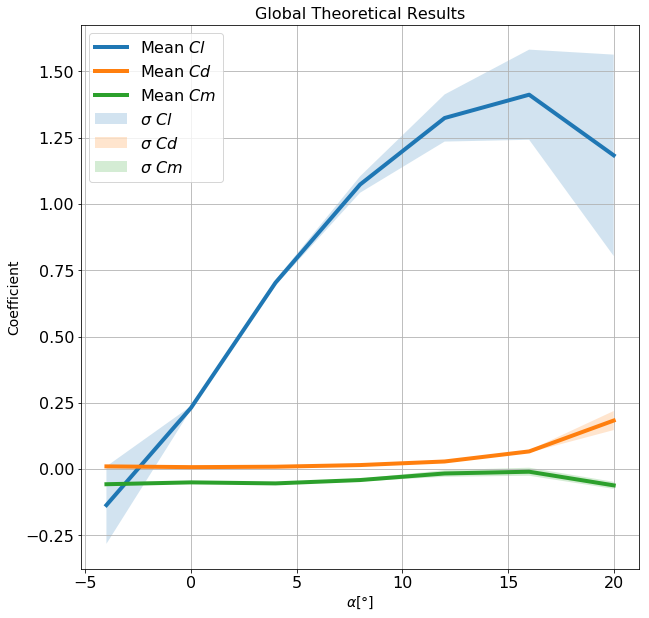

In [26]:
fig = plt.figure(figsize=(10,10))
for x_mean, x_std, header in zip(mean_theoretical.T, std_theoretical.T, header_columns):
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
plt.ylabel("Coefficient",fontsize='14')
plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
plt.tick_params(labelsize=16)
plt.legend(fontsize='16')
plt.grid()
plt.title("Global Theoretical Results", fontsize='16')

In [27]:
plt.close(fig)

### By Coefficient

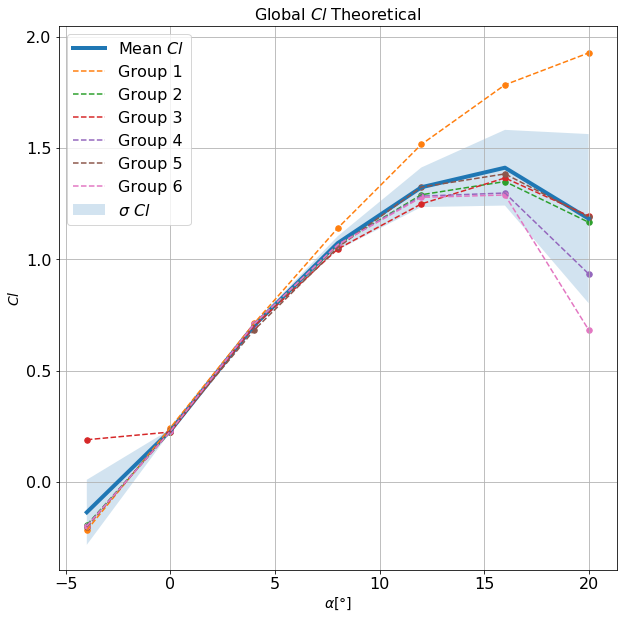

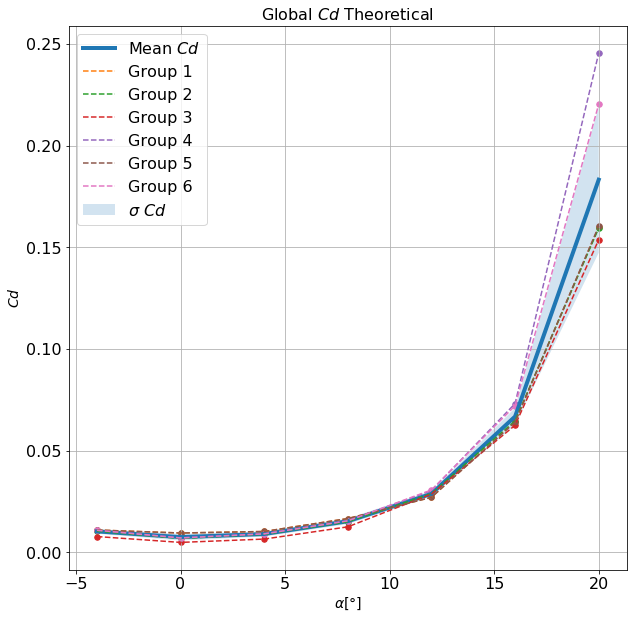

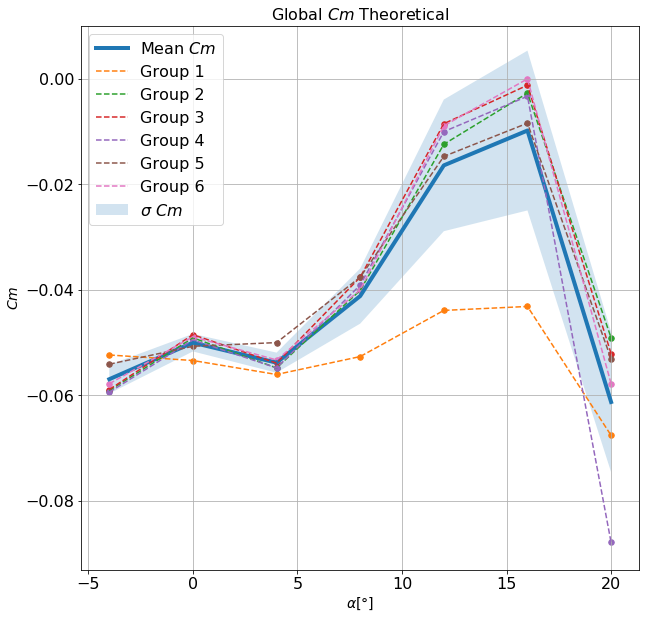

In [28]:
coeff_counter = 0
for x_mean, x_std, header in zip(mean_theoretical.T, std_theoretical.T, header_columns):
    fig = plt.figure(figsize=(10,10))
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
    for i in group_indices:
        group_number = group_numbers[i]
        data_path = theoretical_files[i]
        group_number_file_i, header_columns_i, x = import_data_group(data_path)
        x_array = x.T[coeff_counter]
        plt.scatter(alpha, x_array,s=30)#, label='Group '+str(group_number))
        plt.plot(alpha, x_array,label='Group '+str(group_number),linestyle='--')
    plt.ylabel(r'$'+header+'$', fontsize='14')
    plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    plt.title(r'Global $'+header+'$ Theoretical', fontsize='16')
    coeff_counter = coeff_counter + 1

## Experimental

In [29]:
experimental_all = np.zeros((N_groups, N_angles, N_coeff))

In [30]:
for i in group_indices:
    group_number = group_numbers[i]
    data_path = experimental_files[i]
    group_number_file, header_columns, x = import_data_group(data_path)
    experimental_all[i] = x

In [31]:
mean_experimental = np.nanmean(experimental_all,axis=0)
std_experimental = np.nanstd(experimental_all,axis=0)

Text(0.5,1,'Global Experimental Results')

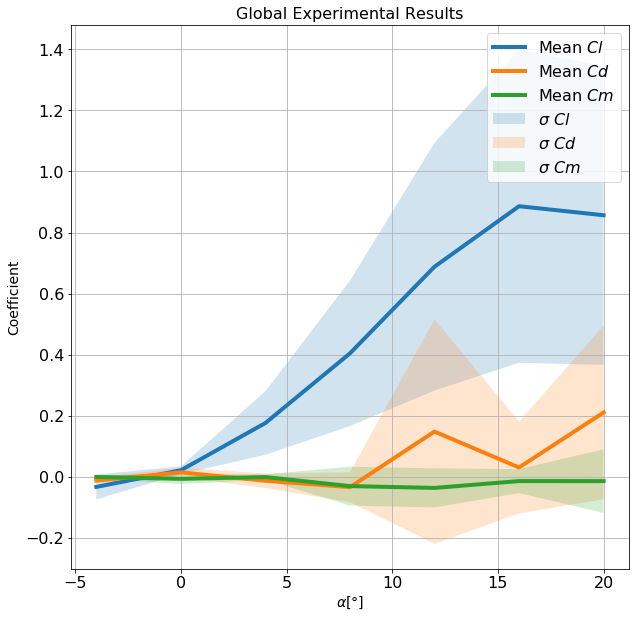

In [32]:
fig = plt.figure(figsize=(10,10))
for x_mean, x_std, header in zip(mean_experimental.T, std_experimental.T, header_columns):
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
plt.ylabel("Coefficient",fontsize='14')
plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
plt.tick_params(labelsize=16)
plt.legend(fontsize='16')
plt.grid()
plt.title("Global Experimental Results", fontsize='16')

In [33]:
plt.close(fig)

### By Coefficient

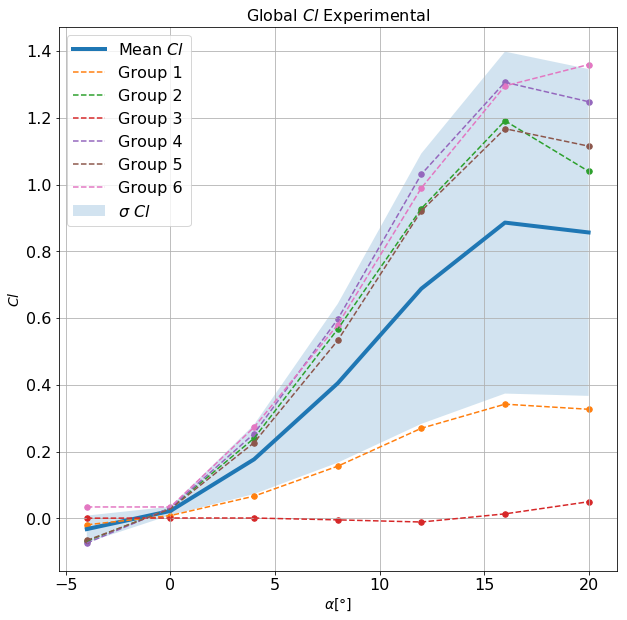

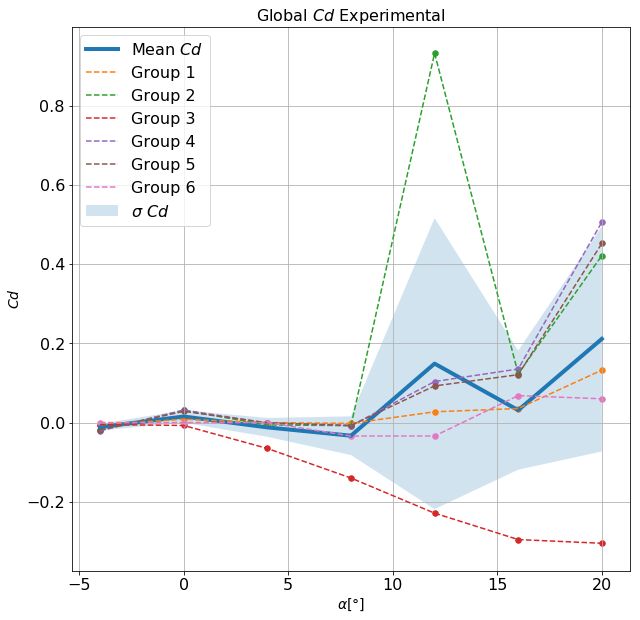

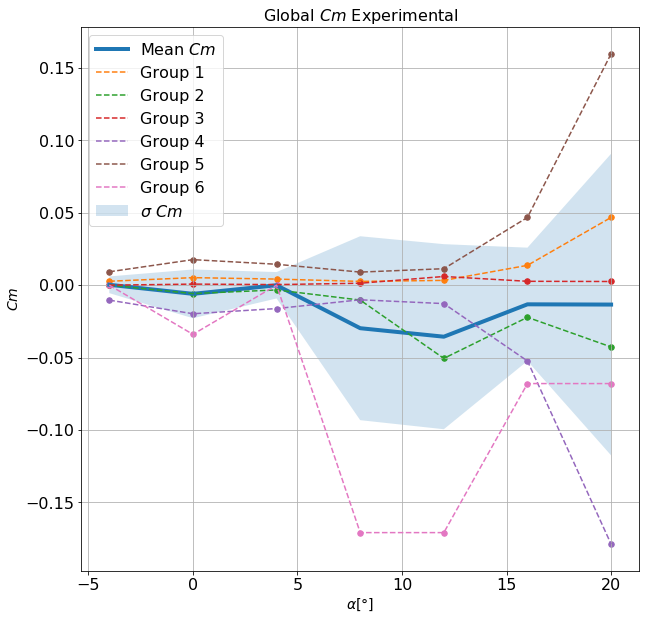

In [34]:
coeff_counter = 0
for x_mean, x_std, header in zip(mean_experimental.T, std_experimental.T, header_columns):
    fig = plt.figure(figsize=(10,10))
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
    for i in group_indices:
        group_number = group_numbers[i]
        data_path = experimental_files[i]
        group_number_file_i, header_columns_i, x = import_data_group(data_path)
        x_array = x.T[coeff_counter]
        plt.scatter(alpha, x_array,s=30)#, label='Group '+str(group_number))
        plt.plot(alpha, x_array,label='Group '+str(group_number),linestyle='--')
    plt.ylabel(r'$'+header+'$', fontsize='14')
    plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    plt.title(r'Global $'+header+'$ Experimental', fontsize='16')
    coeff_counter = coeff_counter + 1

## Global

Ideally we would like to check how accurate are each group in the validation and verification process.
A good way could be to plot the absolute differences between coefficients (num - theo) and (num - exp) and see where each group  is.

### Numerical - Theoretical
We are visualizing how close are the Numerical and Theoretical values for each group

In [68]:
num_theo_all = np.abs(numerical_all - theoretical_all)/(np.abs(numerical_all) + np.abs(theoretical_all))
header_columns_diff = ['|C_{l,num} - C_{l,theo}|_{norm}','|C_{d,num} - C_{d,theo}|_{norm}','|C_{m,num} - C_{m,theo}|_{norm}']

In [69]:
mean_num_theo = np.nanmean(num_theo_all,axis=0)
std_num_theo = np.nanstd(num_theo_all,axis=0)

Text(0.5,1,'Global Numerical-Theoretical Difference')

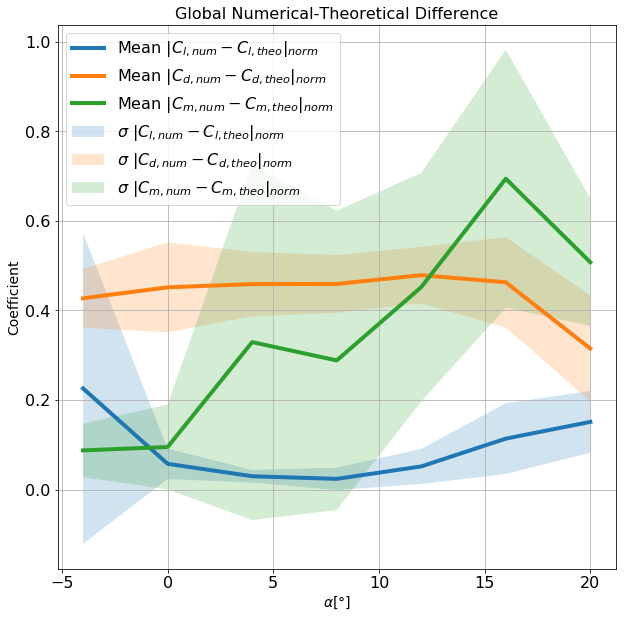

In [70]:
fig = plt.figure(figsize=(10,10))
for x_mean, x_std, header in zip(mean_num_theo.T, std_num_theo.T, header_columns_diff):
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
plt.ylabel("Coefficient",fontsize='14')
plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
plt.tick_params(labelsize=16)
plt.legend(fontsize='16')
plt.grid()
plt.title("Global Numerical-Theoretical Difference", fontsize='16')

### Per Coefficient per angle

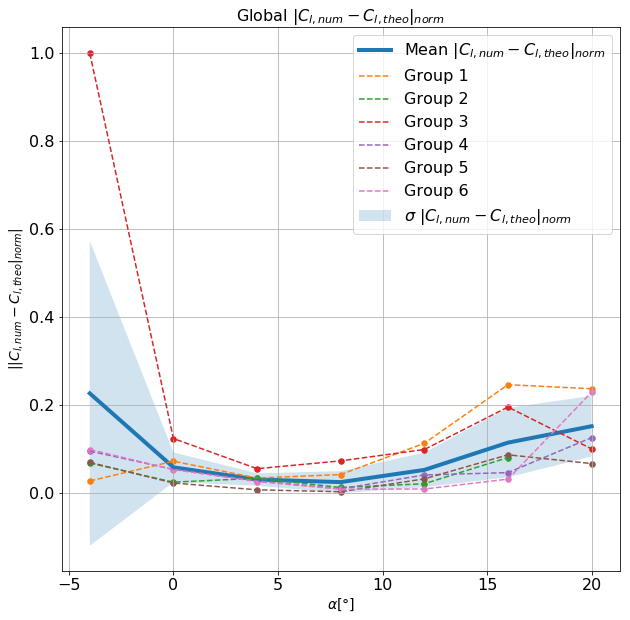

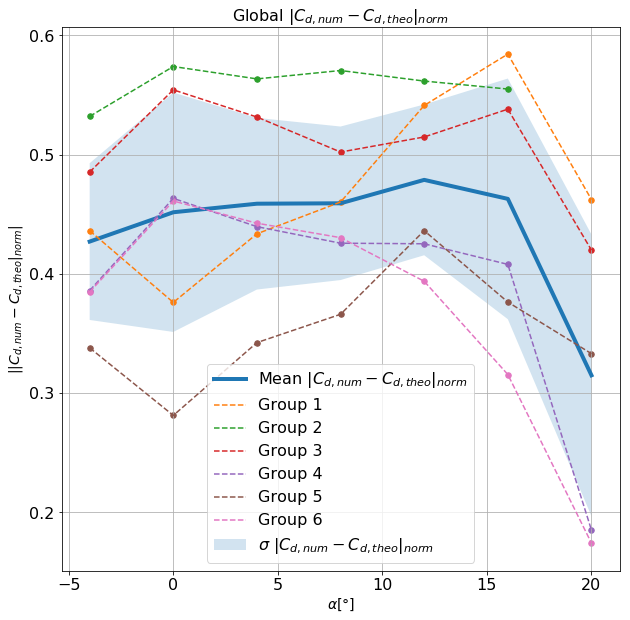

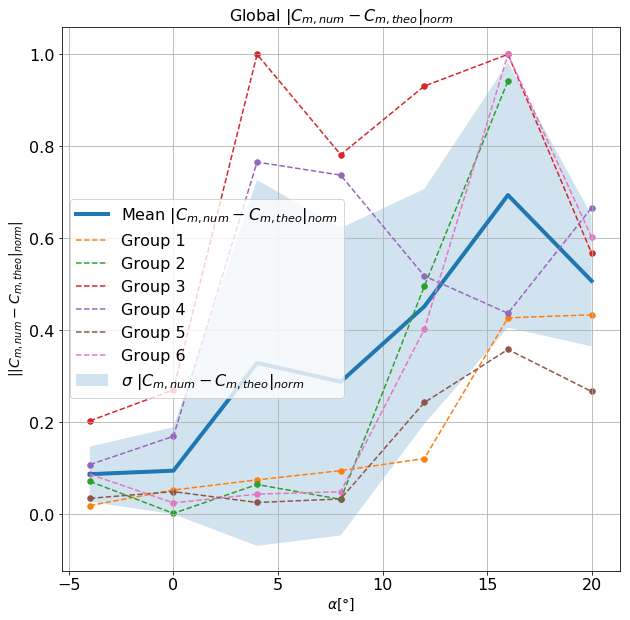

In [71]:
coeff_counter = 0
for x_mean, x_std, header in zip(mean_num_theo.T, std_num_theo.T, header_columns_diff):
    fig = plt.figure(figsize=(10,10))
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
    for i in group_indices:
        group_number = group_numbers[i]
        data_path = theoretical_files[i]
        group_number_file_i, header_columns_i, x = import_data_group(data_path)
        x_array_theo = x.T[coeff_counter]
        data_path = numerical_files[i]
        group_number_file_i, header_columns_i, x = import_data_group(data_path)
        x_array_num = x.T[coeff_counter]
        x_array = np.abs(x_array_num-x_array_theo)/(np.abs(x_array_num)+np.abs(x_array_theo))
        plt.scatter(alpha, x_array,s=30)#, label='Group '+str(group_number))
        plt.plot(alpha, x_array,label='Group '+str(group_number),linestyle='--')
    plt.ylabel(r'|$'+header+'$|', fontsize='14')
    plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    plt.title(r'Global $'+header+'$', fontsize='16')
    coeff_counter = coeff_counter + 1

### Numerical - Experimental
We are visualizing how close are the Numerical and Experimental values for each group

In [73]:
num_exp_all = np.abs(numerical_all - experimental_all)/(np.abs(numerical_all)+np.abs(experimental_all))
header_columns_num_exp= ['|C_{l,num} - C_{l,exp}|_{norm}','|C_{d,num} - C_{d,exp}|_{norm}','|C_{m,num} - C_{m,exp}|_{norm}']

In [74]:
mean_num_exp = np.nanmean(num_exp_all,axis=0)
std_num_exp = np.nanstd(num_exp_all,axis=0)

Text(0.5,1,'Global Numerical-Experimental Difference')

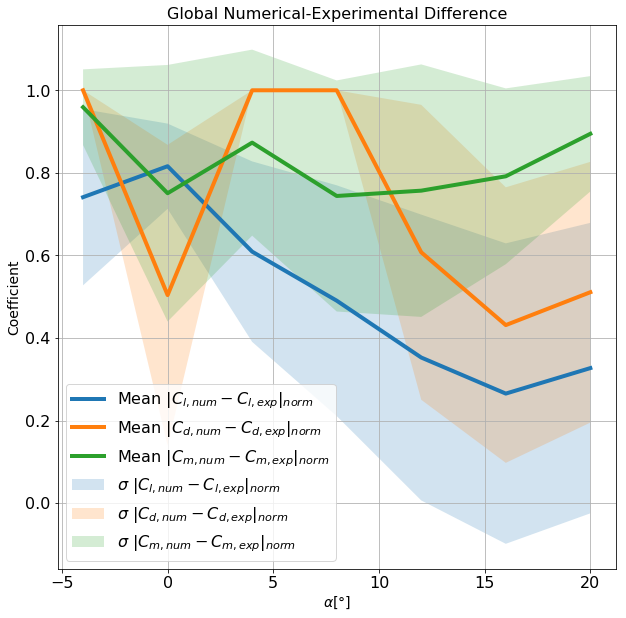

In [75]:
fig = plt.figure(figsize=(10,10))
for x_mean, x_std, header in zip(mean_num_exp.T, std_num_exp.T, header_columns_num_exp):
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
plt.ylabel("Coefficient",fontsize='14')
plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
plt.tick_params(labelsize=16)
plt.legend(fontsize='16')
plt.grid()
plt.title("Global Numerical-Experimental Difference", fontsize='16')

### Per Coefficient per angle

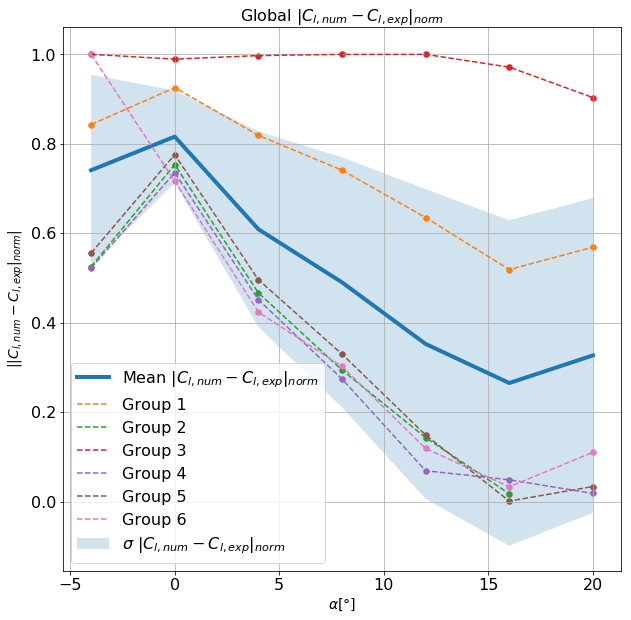

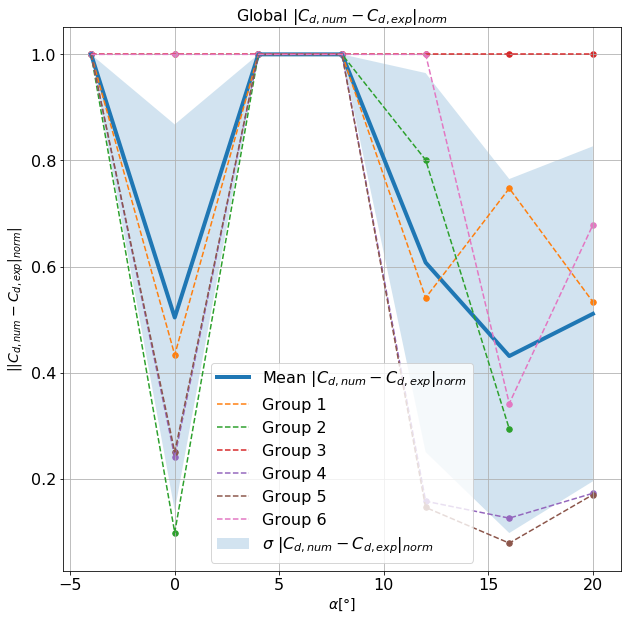

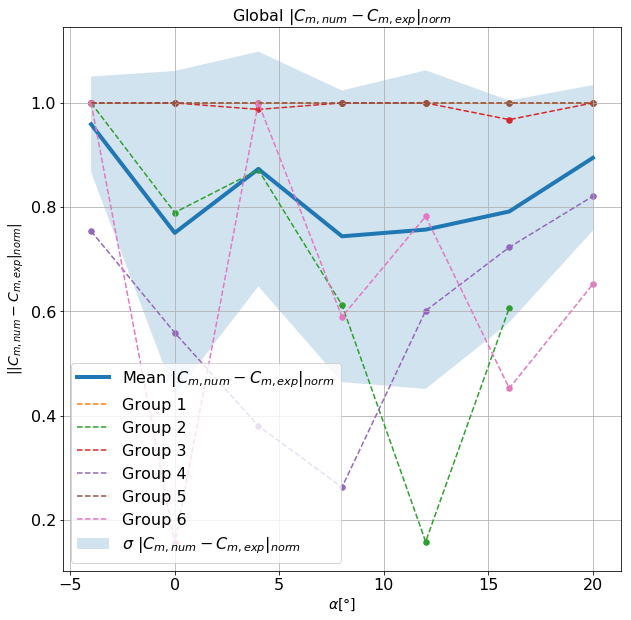

In [76]:
coeff_counter = 0
for x_mean, x_std, header in zip(mean_num_exp.T, std_num_exp.T, header_columns_num_exp):
    fig = plt.figure(figsize=(10,10))
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
    for i in group_indices:
        group_number = group_numbers[i]
        data_path = experimental_files[i]
        group_number_file_i, header_columns_i, x = import_data_group(data_path)
        x_array_exp = x.T[coeff_counter]
        data_path = numerical_files[i]
        group_number_file_i, header_columns_i, x = import_data_group(data_path)
        x_array_num = x.T[coeff_counter]
        x_array = np.abs(x_array_num-x_array_exp)/(np.abs(x_array_num)+np.abs(x_array_exp))
        plt.scatter(alpha, x_array,s=30)#, label='Group '+str(group_number))
        plt.plot(alpha, x_array,label='Group '+str(group_number),linestyle='--')
    plt.ylabel(r'|$'+header+'$|', fontsize='14')
    plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    plt.title(r'Global $'+header+'$', fontsize='16')
    coeff_counter = coeff_counter + 1

### Theoretical - Experimental
We are visualizing how close are the Theoretical and Experimental values for each group

In [77]:
theo_exp_all = np.abs(theoretical_all - experimental_all)/(np.abs(theoretical_all)+np.abs(experimental_all))
header_columns_theo_exp= ['|C_{l,theo} - C_{l,exp}|_{norm}','|C_{d,theo} - C_{d,exp}|_{norm}','|C_{m,theo} - C_{m,exp}|_{norm}']

In [78]:
mean_theo_exp = np.nanmean(theo_exp_all,axis=0)
std_theo_exp = np.nanstd(theo_exp_all,axis=0)

Text(0.5,1,'Global Theoretical-Experimental Difference')

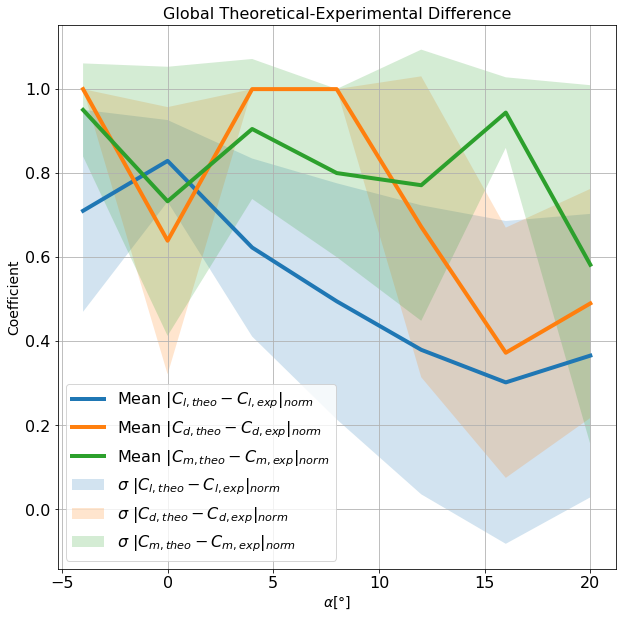

In [79]:
fig = plt.figure(figsize=(10,10))
for x_mean, x_std, header in zip(mean_theo_exp.T, std_theo_exp.T, header_columns_theo_exp):
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
plt.ylabel("Coefficient",fontsize='14')
plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
plt.tick_params(labelsize=16)
plt.legend(fontsize='16')
plt.grid()
plt.title("Global Theoretical-Experimental Difference", fontsize='16')

### Per Coefficient per angle

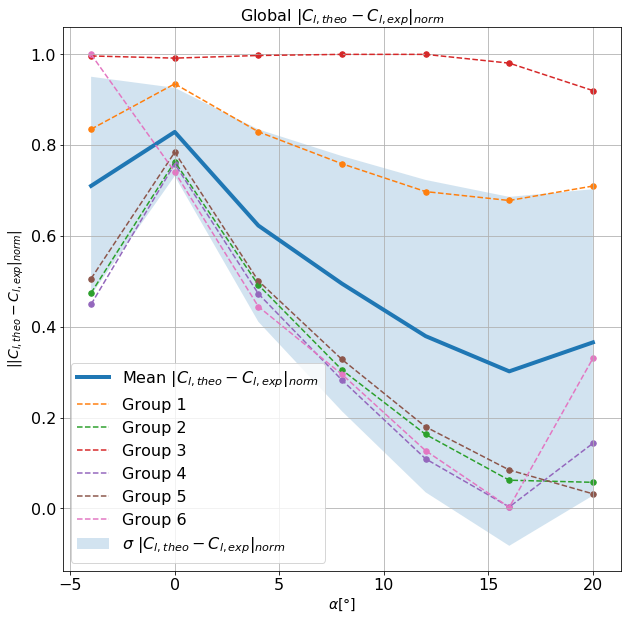

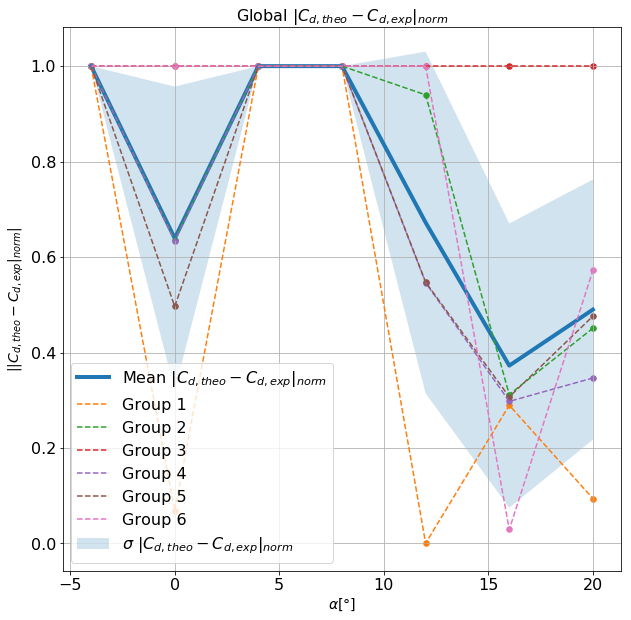

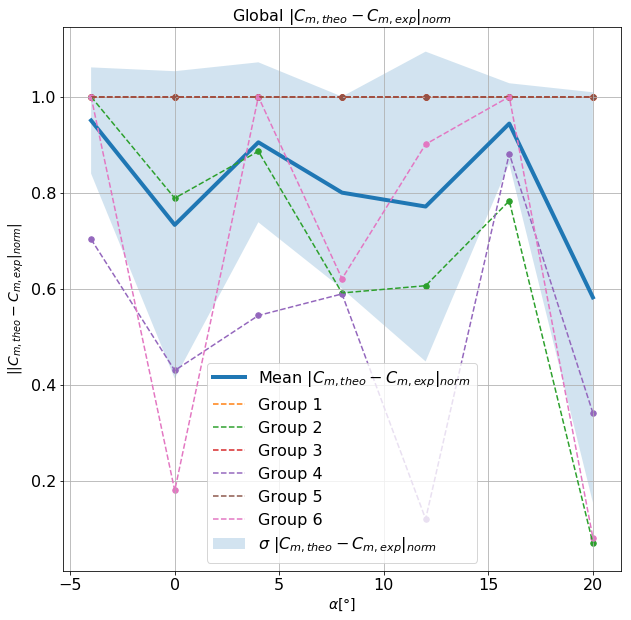

In [80]:
coeff_counter = 0
for x_mean, x_std, header in zip(mean_theo_exp.T, std_theo_exp.T, header_columns_theo_exp):
    fig = plt.figure(figsize=(10,10))
    plt.plot(alpha, x_mean, label=r'Mean $'+header+'$', linewidth =4)
    plt.fill_between(alpha,x_mean+x_std,x_mean-x_std,alpha=0.2,label =r'$\sigma$ $'+str(header)+'$' )
    for i in group_indices:
        group_number = group_numbers[i]
        data_path = experimental_files[i]
        group_number_file_i, header_columns_i, x = import_data_group(data_path)
        x_array_exp = x.T[coeff_counter]
        data_path = theoretical_files[i]
        group_number_file_i, header_columns_i, x = import_data_group(data_path)
        x_array_theo = x.T[coeff_counter]
        x_array = np.abs(x_array_theo-x_array_exp)/(np.abs(x_array_theo)+np.abs(x_array_exp))
        plt.scatter(alpha, x_array,s=30)#, label='Group '+str(group_number))
        plt.plot(alpha, x_array,label='Group '+str(group_number),linestyle='--')
    plt.ylabel(r'|$'+header+'$|', fontsize='14')
    plt.xlabel(r'$\alpha$[$\degree$]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    plt.title(r'Global $'+header+'$', fontsize='16')
    coeff_counter = coeff_counter + 1

Now we are going to visualize the values per coeff (so we mean and std by coeff for all angles)